# **[ YOLOv8을 활용한 드론 인식 모델 구축 및 TFLite로의 과정을 작성 ]**

# 1-1. 필요한 패키지 설치

In [1]:
# Ultralytics YOLOv8 설치
!pip install ultralytics

# 기타 필요 라이브러리
!pip install opencv-python matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
from ultralytics import YOLO

# YOLOv8n (nano) 모델 불러오기
model = YOLO("yolov8n.pt")
print("YOLOv8 설치 완료!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]

YOLOv8 설치 완료!


In [3]:
!apt-get install libopencv-dev

!rm -rf /content/darknet
# Darknet  설치
!git clone https://github.com/AlexeyAB/darknet.git /content/darknet
%cd /content/darknet

# Makefile 수정: GPU, CUDNN, OpenCV 활성화
!sed -i 's/GPU=0/GPU=1/' Makefile  # GPU 활성화
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile  # CUDNN 활성화
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile  # OpenCV 활성화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Cloning into '/content/darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 13.55 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c 

In [47]:
# Darknet 컴파일
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

In [4]:
# Dataset 처리
!cp /content/Database1.zip /content/darknet/

In [5]:
%cd /content/darknet/
!unzip Database1.zip -d data/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: data/Database1/video17_1030.txt  
  inflating: data/Database1/video17_1031.JPEG  
  inflating: data/Database1/video17_1031.txt  
  inflating: data/Database1/video17_1032.JPEG  
  inflating: data/Database1/video17_1032.txt  
  inflating: data/Database1/video17_1033.JPEG  
  inflating: data/Database1/video17_1033.txt  
  inflating: data/Database1/video17_1034.JPEG  
  inflating: data/Database1/video17_1034.txt  
  inflating: data/Database1/video17_1035.JPEG  
  inflating: data/Database1/video17_1035.txt  
  inflating: data/Database1/video17_1036.JPEG  
  inflating: data/Database1/video17_1036.txt  
  inflating: data/Database1/video17_1037.JPEG  
 extracting: data/Database1/video17_1037.txt  
  inflating: data/Database1/video17_104.JPEG  
  inflating: data/Database1/video17_104.txt  
  inflating: data/Database1/video17_1045.JPEG  
  inflating: data/Database1/video17_1045.txt  
  inflating: data/Database1/video17_1046.JPEG  
  inflating: dat

In [6]:
#복사 제대로 됐나 ㅌ테스트용
import os

folder_path = "/content/darknet/data/Database1"

# 모든 파일 개수
all_files = os.listdir(folder_path)
print(f"총 파일 개수: {len(all_files)}")

# 특정 확장자 개수 (JPEG)
jpeg_files = [f for f in all_files if f.endswith(".JPEG")]
print(f"JPEG 파일 개수: {len(jpeg_files)}")

# 특정 확장자 개수 (TXT)
txt_files = [f for f in all_files if f.endswith(".txt")]
print(f"TXT 파일 개수: {len(txt_files)}")

# 8025 / 4012 / 4010 이면 맞음

총 파일 개수: 8025
JPEG 파일 개수: 4012
TXT 파일 개수: 4010


In [22]:
!cp /content/yolov2-tiny-voc.cfg /content/darknet/cfg/custom_yolov3.cfg

# 1-2. 데이터셋 정리 (훈련 / 테스트)

In [8]:
import os
import random

# 데이터 경로 설정
data_path = "/content/darknet/data/Database1/"
image_ext = ".JPEG"  # 이미지 확장자
split_ratio = 0.8  # Train 80%, Test 20%

# 이미지 파일 리스트 가져오기 (YOLO 라벨이 존재하는 것만)
image_files = [f for f in os.listdir(data_path) if f.endswith(image_ext)]
image_files = [f for f in image_files if os.path.exists(os.path.join(data_path, f.replace(image_ext, ".txt")))]

# 데이터 섞기
random.shuffle(image_files)

# Train/Test 나누기
split_index = int(len(image_files) * split_ratio)
train_files = image_files[:split_index]
test_files = image_files[split_index:]

# train.txt와 test.txt 생성
with open("/content/darknet/data/train.txt", "w") as train_f:
    for img in train_files:
        train_f.write(f"data/Database1/{img}\n")

with open("/content/darknet/data/test.txt", "w") as test_f:
    for img in test_files:
        test_f.write(f"data/Database1/{img}\n")

print(f"Train set: {len(train_files)} images")
print(f"Test set: {len(test_files)} images")


Train set: 3208 images
Test set: 802 images


In [9]:
num_classes = 1

with open("/content/darknet/data/voc.data", "w") as f:
    f.write(f"classes={num_classes}\n")
    f.write("train=data/train.txt\n")
    f.write("valid=data/test.txt\n")
    f.write("names=data/voc.names\n")
    f.write("backup=backup/\n")

with open("/content/darknet/data/voc.names", "w") as f:
    f.write("drone\n")  # 클래스 이름 (여러 개면 줄바꿈 추가)


In [11]:
# 가중치 파일 다운로드
!wget https://pjreddie.com/media/files/darknet53.conv.74 -O darknet53.conv.74

--2025-03-14 05:08:35--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.6MB/s    in 10s     

2025-03-14 05:08:46 (15.1 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [32]:
!apt-get update
!apt-get install cuda-11-2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.0 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,744 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,798 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launc

In [31]:
!nvidia-smi  # 현재 GPU와 드라이버 정보 확인
!nvcc --version  # CUDA 버전 확인


Fri Mar 14 05:58:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 1-3. 학습 및 훈련

In [48]:
# YOLO 학습 실행
!./darknet detector train data/voc.data cfg/custom_yolov3.cfg darknet53.conv.74 -dont_show -map

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 

In [53]:
!./darknet detector train data/voc.data cfg/custom_yolov3.cfg backup/custom_yolov3_last.weights -dont_show -map

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 

In [54]:
#테스트
import os

# 폴더 생성
os.makedirs('/content/Test/Origin', exist_ok=True)
os.makedirs('/content/Test/Result', exist_ok=True)

In [79]:
!./darknet detector test data/voc.data cfg/custom_yolov3.cfg backup/custom_yolov3_last.weights /content/Test/Origin/Origin1.png -out_filename /content/Test/Result/Origin1_result.png

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256  

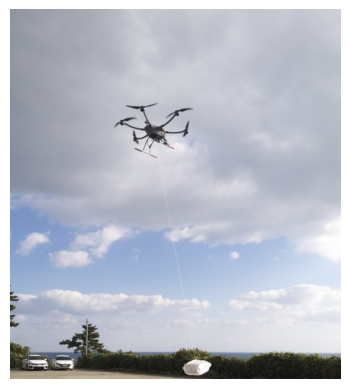

In [78]:
import cv2

# 이미지 불러오기
image = cv2.imread('/content/Test/Origin/Origin1.png')

# 라벨 텍스트 파일 읽기
with open('/content/Test/Result/Origin1_result.txt', 'r') as f:
    lines = f.readlines()

# 라벨을 이미지에 그리기
for line in lines:
    # 라인에서 숫자 형태의 값만 필터링 (예: class_id, x_center, y_center, width, height)
    values = line.strip().split()

    # 라벨이 포함된 라인만 처리 (숫자들로 이루어져 있는 라인만 사용)
    if len(values) >= 5 and values[0].isdigit():
        class_id, x_center, y_center, width, height = map(float, values[0:5])

        # 좌표 계산 (이미지 크기와 비율 맞추기)
        img_height, img_width = image.shape[:2]
        x_center = int(x_center * img_width)
        y_center = int(y_center * img_height)
        width = int(width * img_width)
        height = int(height * img_height)

        # 사각형 그리기 (라벨과 함께)
        cv2.rectangle(image, (x_center - width // 2, y_center - height // 2),
                      (x_center + width // 2, y_center + height // 2), (0, 255, 0), 2)
        cv2.putText(image, f'Class {int(class_id)}', (x_center - width // 2, y_center - height // 2 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 시각화
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 제거
plt.show()
